In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('mimic_synthetic_train.csv', index_col=False)

FileNotFoundError: [Errno 2] File b'mimic_synthetic_train.csv' does not exist: b'mimic_synthetic_train.csv'

In [4]:
train = train.drop([0],axis=0)

train=train.dropna()

data=pd.get_dummies(train['ICU'])
train=pd.concat([train, data], axis=1)
train=train.drop(['ICU'],axis=1)


data1=pd.get_dummies(train['GENDER'])
train=pd.concat([train, data1], axis=1)
train=train.drop(['GENDER'],axis=1)

NameError: name 'train' is not defined

In [4]:
df=train['Output']
train=train.drop(['Output'],axis=1)
train=pd.concat([train, df], axis=1)


In [6]:
train.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,AGE,...,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M,Output
1,50520,186416,2134-03-17_03:59:00,2113-03-06_12:05:00,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,39,...,0.0,1.0,1,0,0,0,0,0,1,0
2,17956,126413,2164-04-05_17:32:00,2180-09-20_16:30:00,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,40,...,0.0,0.0,0,0,1,0,0,0,1,0
3,90258,109355,2102-09-08_00:58:00,2166-06-26_15:30:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,75,...,1.0,0.0,1,0,0,0,0,0,1,0
4,25159,123784,2163-08-06_12:07:00,2147-01-14_18:40:00,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,55,...,0.0,0.0,0,0,1,0,0,1,0,0
5,11634,144424,2147-08-30_19:51:00,2136-11-19_18:53:00,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,66,...,0.0,0.0,0,0,0,0,1,1,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79985 entries, 1 to 79998
Columns: 347 entries, SUBJECT_ID to Output
dtypes: float64(327), int64(4), object(9), uint8(7)
memory usage: 208.6+ MB


In [8]:
train.describe()

,SUBJECT_ID,HADM_ID,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,...,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M,Output
count,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,...,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000,79985.000000
mean,37929.527074,150061.608102,62.659724,71.648765,103.082776,86.394982,94.611675,147.789117,119.654730,45.243960,...,0.457673,0.078965,0.147153,0.209864,0.347253,0.160043,0.135688,0.419641,0.580359,0.034969
std,29301.626755,29005.582446,18.193840,14.652308,18.478427,15.509468,16.938655,21.607250,16.484710,10.499476,...,0.498208,0.269686,0.354260,0.407214,0.476100,0.366648,0.342459,0.493503,0.493503,0.183703
min,3.000000,100001.000000,16.000000,18.728695,49.860610,38.503600,31.768501,91.693405,73.968796,11.334383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13853.000000,124750.000000,51.000000,61.459797,89.899690,75.287350,82.811450,132.121570,107.559990,37.832344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27593.000000,150045.000000,65.000000,71.049360,101.585940,85.422560,94.168460,145.412020,118.117890,44.621990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,62478.000000,175452.000000,77.000000,81.148950,114.800600,96.505170,105.963850,161.115480,130.292660,51.966244,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,99999.000000,199999.000000,90.000000,141.859680,206.621150,157.612470,163.822920,260.044980,186.328400,95.604270,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = train.iloc[:,9:346].values
y=train['Output']

In [9]:
from  imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_res,y_train_res = sm.fit_sample(X_train,np.ravel(y_train))
print(sum(y_train_res==0))
print(sum(y_train_res==1))

ModuleNotFoundError: No module named 'imblearn'

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
classifier = Sequential()
classifier.add(Dense(output_dim=450,init='uniform',activation='relu',input_dim=337))
classifier.add(Dense(output_dim=450,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=337, units=450, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


In [13]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
classifier.fit(X_train,y_train,batch_size=100,nb_epoch=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
55989/55989 [==============================] - 7s 133us/step - loss: 0.1425 - acc: 0.9629
Epoch 2/5
55989/55989 [==============================] - 8s 141us/step - loss: 0.1176 - acc: 0.9659
Epoch 3/5
55989/55989 [==============================] - 8s 143us/step - loss: 0.1105 - acc: 0.9667
Epoch 4/5
55989/55989 [==============================] - 9s 155us/step - loss: 0.1053 - acc: 0.9676 1s - lo
Epoch 5/5
55989/55989 [==============================] - 9s 153us/step - loss: 0.0985 - acc: 0.9686


In [16]:
j=0
for i in y_test:
    print(j,end=" ")
    j=j+1
    print(i)
    

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 1
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 1
59 0
60 0
61 0
62 0
63 1
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 1
73 0
74 0
75 0
76 0
77 0
78 1
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 1
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 1
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 1
169 0
170 0
171 1
172 0
173 0
174 0
175 0
176 0
177 1
178 0
179 0
180 0
181 0
182 0
183 0
184 0


1491 0
1492 0
1493 0
1494 0
1495 0
1496 0
1497 0
1498 0
1499 0
1500 0
1501 0
1502 0
1503 0
1504 0
1505 0
1506 0
1507 0
1508 0
1509 0
1510 0
1511 0
1512 0
1513 1
1514 0
1515 0
1516 0
1517 0
1518 0
1519 0
1520 0
1521 0
1522 0
1523 0
1524 0
1525 0
1526 0
1527 0
1528 0
1529 0
1530 0
1531 0
1532 0
1533 0
1534 0
1535 0
1536 0
1537 0
1538 0
1539 0
1540 0
1541 0
1542 0
1543 0
1544 0
1545 0
1546 0
1547 0
1548 0
1549 0
1550 0
1551 0
1552 0
1553 0
1554 0
1555 0
1556 0
1557 0
1558 0
1559 0
1560 0
1561 0
1562 1
1563 0
1564 0
1565 0
1566 0
1567 0
1568 0
1569 0
1570 0
1571 0
1572 0
1573 0
1574 0
1575 0
1576 0
1577 1
1578 0
1579 0
1580 0
1581 0
1582 0
1583 0
1584 0
1585 0
1586 0
1587 0
1588 0
1589 0
1590 0
1591 0
1592 0
1593 0
1594 0
1595 0
1596 0
1597 0
1598 1
1599 0
1600 0
1601 0
1602 0
1603 0
1604 0
1605 0
1606 0
1607 0
1608 0
1609 0
1610 0
1611 0
1612 0
1613 0
1614 0
1615 0
1616 0
1617 0
1618 0
1619 0
1620 0
1621 0
1622 0
1623 0
1624 0
1625 0
1626 0
1627 0
1628 0
1629 0
1630 0
1631 0
1632 0
1633 0

2740 1
2741 0
2742 0
2743 0
2744 0
2745 0
2746 0
2747 0
2748 0
2749 0
2750 0
2751 0
2752 0
2753 0
2754 0
2755 0
2756 0
2757 0
2758 0
2759 0
2760 0
2761 0
2762 0
2763 0
2764 0
2765 0
2766 0
2767 0
2768 0
2769 0
2770 0
2771 0
2772 0
2773 0
2774 0
2775 0
2776 0
2777 0
2778 0
2779 0
2780 0
2781 0
2782 0
2783 0
2784 0
2785 0
2786 1
2787 0
2788 0
2789 0
2790 0
2791 0
2792 0
2793 0
2794 0
2795 0
2796 0
2797 0
2798 0
2799 0
2800 0
2801 0
2802 0
2803 0
2804 0
2805 0
2806 0
2807 0
2808 0
2809 0
2810 0
2811 0
2812 0
2813 0
2814 0
2815 0
2816 0
2817 0
2818 0
2819 0
2820 0
2821 0
2822 0
2823 0
2824 1
2825 0
2826 0
2827 0
2828 0
2829 0
2830 0
2831 0
2832 0
2833 0
2834 0
2835 1
2836 0
2837 0
2838 0
2839 0
2840 0
2841 0
2842 0
2843 0
2844 0
2845 0
2846 0
2847 0
2848 0
2849 0
2850 0
2851 0
2852 0
2853 0
2854 0
2855 1
2856 0
2857 0
2858 0
2859 0
2860 0
2861 0
2862 0
2863 0
2864 0
2865 0
2866 0
2867 0
2868 0
2869 0
2870 0
2871 0
2872 0
2873 0
2874 0
2875 0
2876 0
2877 0
2878 0
2879 0
2880 0
2881 0
2882 0

4240 0
4241 0
4242 0
4243 0
4244 0
4245 0
4246 0
4247 0
4248 0
4249 1
4250 0
4251 0
4252 0
4253 0
4254 0
4255 0
4256 0
4257 0
4258 1
4259 0
4260 0
4261 0
4262 0
4263 0
4264 0
4265 0
4266 0
4267 0
4268 0
4269 0
4270 0
4271 0
4272 0
4273 0
4274 0
4275 0
4276 0
4277 0
4278 0
4279 0
4280 0
4281 0
4282 0
4283 0
4284 0
4285 0
4286 0
4287 0
4288 0
4289 0
4290 0
4291 0
4292 0
4293 0
4294 0
4295 0
4296 0
4297 0
4298 0
4299 0
4300 0
4301 0
4302 0
4303 0
4304 0
4305 0
4306 0
4307 0
4308 0
4309 0
4310 0
4311 0
4312 0
4313 0
4314 0
4315 0
4316 0
4317 0
4318 0
4319 0
4320 0
4321 0
4322 0
4323 0
4324 0
4325 0
4326 0
4327 0
4328 0
4329 0
4330 0
4331 0
4332 1
4333 0
4334 0
4335 0
4336 0
4337 0
4338 0
4339 0
4340 0
4341 0
4342 0
4343 1
4344 0
4345 0
4346 0
4347 0
4348 0
4349 0
4350 0
4351 0
4352 0
4353 0
4354 0
4355 0
4356 0
4357 0
4358 0
4359 0
4360 0
4361 0
4362 1
4363 0
4364 0
4365 0
4366 0
4367 0
4368 0
4369 0
4370 1
4371 0
4372 0
4373 0
4374 0
4375 0
4376 0
4377 0
4378 0
4379 0
4380 0
4381 0
4382 0

5739 0
5740 0
5741 0
5742 0
5743 0
5744 0
5745 0
5746 0
5747 0
5748 0
5749 0
5750 0
5751 0
5752 0
5753 0
5754 0
5755 0
5756 0
5757 0
5758 0
5759 0
5760 0
5761 0
5762 0
5763 0
5764 0
5765 0
5766 0
5767 0
5768 0
5769 0
5770 0
5771 0
5772 0
5773 0
5774 0
5775 0
5776 0
5777 0
5778 0
5779 0
5780 0
5781 0
5782 1
5783 0
5784 0
5785 0
5786 0
5787 0
5788 0
5789 0
5790 0
5791 0
5792 0
5793 0
5794 0
5795 0
5796 1
5797 0
5798 0
5799 0
5800 0
5801 0
5802 1
5803 1
5804 0
5805 0
5806 0
5807 0
5808 0
5809 0
5810 0
5811 0
5812 0
5813 0
5814 0
5815 0
5816 0
5817 0
5818 0
5819 0
5820 0
5821 0
5822 0
5823 0
5824 0
5825 0
5826 0
5827 0
5828 0
5829 0
5830 0
5831 0
5832 0
5833 0
5834 0
5835 0
5836 0
5837 0
5838 0
5839 0
5840 1
5841 0
5842 0
5843 0
5844 0
5845 0
5846 0
5847 0
5848 0
5849 0
5850 0
5851 0
5852 0
5853 0
5854 0
5855 0
5856 0
5857 0
5858 0
5859 0
5860 0
5861 0
5862 0
5863 0
5864 1
5865 1
5866 0
5867 0
5868 0
5869 0
5870 0
5871 0
5872 0
5873 0
5874 0
5875 0
5876 0
5877 0
5878 0
5879 0
5880 0
5881 0

7238 0
7239 0
7240 0
7241 0
7242 0
7243 0
7244 0
7245 0
7246 0
7247 0
7248 0
7249 0
7250 0
7251 0
7252 0
7253 0
7254 0
7255 0
7256 0
7257 0
7258 0
7259 0
7260 0
7261 0
7262 0
7263 0
7264 0
7265 0
7266 0
7267 0
7268 1
7269 1
7270 0
7271 0
7272 0
7273 0
7274 0
7275 0
7276 0
7277 0
7278 0
7279 0
7280 0
7281 0
7282 0
7283 0
7284 0
7285 0
7286 0
7287 0
7288 0
7289 0
7290 0
7291 0
7292 0
7293 0
7294 0
7295 0
7296 0
7297 0
7298 0
7299 0
7300 0
7301 0
7302 0
7303 0
7304 0
7305 0
7306 0
7307 0
7308 0
7309 0
7310 0
7311 0
7312 0
7313 0
7314 0
7315 0
7316 0
7317 0
7318 0
7319 0
7320 0
7321 0
7322 0
7323 0
7324 0
7325 0
7326 0
7327 0
7328 0
7329 0
7330 0
7331 0
7332 0
7333 0
7334 0
7335 0
7336 0
7337 0
7338 0
7339 0
7340 0
7341 0
7342 0
7343 0
7344 0
7345 0
7346 0
7347 0
7348 0
7349 0
7350 0
7351 0
7352 0
7353 0
7354 0
7355 0
7356 0
7357 0
7358 0
7359 0
7360 0
7361 0
7362 0
7363 0
7364 0
7365 0
7366 0
7367 0
7368 0
7369 0
7370 0
7371 0
7372 0
7373 0
7374 0
7375 0
7376 0
7377 0
7378 0
7379 0
7380 0

8737 0
8738 0
8739 0
8740 0
8741 0
8742 0
8743 0
8744 0
8745 0
8746 0
8747 0
8748 0
8749 0
8750 0
8751 0
8752 0
8753 0
8754 0
8755 0
8756 0
8757 0
8758 0
8759 0
8760 0
8761 0
8762 0
8763 0
8764 0
8765 0
8766 0
8767 0
8768 0
8769 0
8770 0
8771 0
8772 0
8773 0
8774 0
8775 0
8776 0
8777 0
8778 0
8779 0
8780 0
8781 0
8782 0
8783 0
8784 0
8785 0
8786 0
8787 0
8788 0
8789 0
8790 0
8791 0
8792 0
8793 0
8794 0
8795 0
8796 0
8797 0
8798 0
8799 0
8800 0
8801 0
8802 0
8803 1
8804 0
8805 0
8806 0
8807 0
8808 0
8809 0
8810 0
8811 1
8812 0
8813 0
8814 0
8815 0
8816 0
8817 0
8818 0
8819 0
8820 0
8821 0
8822 0
8823 1
8824 0
8825 0
8826 0
8827 0
8828 0
8829 0
8830 0
8831 0
8832 0
8833 0
8834 0
8835 0
8836 0
8837 0
8838 0
8839 0
8840 0
8841 0
8842 0
8843 0
8844 0
8845 0
8846 0
8847 0
8848 0
8849 0
8850 0
8851 0
8852 0
8853 0
8854 0
8855 0
8856 0
8857 0
8858 0
8859 0
8860 0
8861 0
8862 0
8863 0
8864 0
8865 0
8866 0
8867 0
8868 0
8869 1
8870 0
8871 0
8872 0
8873 0
8874 0
8875 0
8876 0
8877 0
8878 0
8879 0

9987 0
9988 0
9989 0
9990 0
9991 0
9992 0
9993 0
9994 0
9995 0
9996 1
9997 0
9998 0
9999 0
10000 0
10001 0
10002 0
10003 0
10004 0
10005 0
10006 0
10007 0
10008 1
10009 0
10010 0
10011 0
10012 0
10013 0
10014 0
10015 0
10016 0
10017 0
10018 0
10019 0
10020 0
10021 0
10022 0
10023 0
10024 0
10025 0
10026 0
10027 0
10028 0
10029 0
10030 0
10031 0
10032 0
10033 0
10034 0
10035 0
10036 1
10037 0
10038 0
10039 0
10040 0
10041 0
10042 0
10043 0
10044 0
10045 0
10046 0
10047 0
10048 0
10049 0
10050 0
10051 0
10052 0
10053 0
10054 0
10055 0
10056 0
10057 0
10058 0
10059 0
10060 0
10061 0
10062 0
10063 0
10064 0
10065 0
10066 0
10067 0
10068 1
10069 0
10070 0
10071 0
10072 0
10073 0
10074 0
10075 0
10076 0
10077 0
10078 0
10079 0
10080 0
10081 0
10082 0
10083 0
10084 0
10085 0
10086 0
10087 0
10088 0
10089 0
10090 0
10091 1
10092 0
10093 0
10094 0
10095 0
10096 0
10097 0
10098 0
10099 0
10100 0
10101 0
10102 0
10103 0
10104 0
10105 0
10106 0
10107 0
10108 0
10109 0
10110 0
10111 0
10112 0
10113

11026 1
11027 0
11028 0
11029 0
11030 0
11031 0
11032 0
11033 0
11034 0
11035 0
11036 0
11037 0
11038 0
11039 0
11040 0
11041 0
11042 0
11043 0
11044 0
11045 0
11046 0
11047 0
11048 0
11049 0
11050 0
11051 0
11052 0
11053 0
11054 0
11055 0
11056 0
11057 0
11058 0
11059 0
11060 0
11061 0
11062 0
11063 0
11064 0
11065 0
11066 0
11067 0
11068 1
11069 0
11070 0
11071 0
11072 0
11073 0
11074 0
11075 0
11076 0
11077 0
11078 0
11079 0
11080 0
11081 0
11082 0
11083 0
11084 0
11085 0
11086 0
11087 0
11088 0
11089 0
11090 0
11091 0
11092 0
11093 0
11094 0
11095 0
11096 0
11097 1
11098 0
11099 0
11100 0
11101 0
11102 0
11103 0
11104 0
11105 0
11106 0
11107 0
11108 0
11109 0
11110 0
11111 0
11112 0
11113 0
11114 1
11115 0
11116 0
11117 0
11118 0
11119 0
11120 0
11121 0
11122 0
11123 0
11124 0
11125 0
11126 0
11127 0
11128 0
11129 0
11130 0
11131 0
11132 0
11133 1
11134 0
11135 0
11136 0
11137 0
11138 0
11139 0
11140 0
11141 0
11142 0
11143 0
11144 0
11145 0
11146 0
11147 0
11148 0
11149 0
11150 0


12485 0
12486 0
12487 0
12488 0
12489 0
12490 0
12491 0
12492 0
12493 0
12494 0
12495 0
12496 0
12497 0
12498 0
12499 0
12500 0
12501 0
12502 1
12503 0
12504 0
12505 0
12506 0
12507 1
12508 0
12509 0
12510 0
12511 0
12512 0
12513 0
12514 0
12515 0
12516 0
12517 0
12518 0
12519 0
12520 0
12521 0
12522 0
12523 1
12524 0
12525 0
12526 0
12527 0
12528 0
12529 0
12530 1
12531 0
12532 0
12533 0
12534 0
12535 1
12536 0
12537 0
12538 0
12539 0
12540 1
12541 0
12542 0
12543 0
12544 0
12545 0
12546 0
12547 0
12548 0
12549 0
12550 0
12551 0
12552 0
12553 0
12554 0
12555 0
12556 0
12557 0
12558 0
12559 0
12560 1
12561 0
12562 0
12563 0
12564 0
12565 0
12566 0
12567 0
12568 0
12569 0
12570 0
12571 0
12572 0
12573 0
12574 0
12575 0
12576 0
12577 0
12578 1
12579 0
12580 0
12581 0
12582 0
12583 1
12584 0
12585 0
12586 0
12587 0
12588 0
12589 0
12590 0
12591 0
12592 0
12593 0
12594 0
12595 0
12596 0
12597 0
12598 0
12599 0
12600 0
12601 0
12602 0
12603 0
12604 0
12605 0
12606 0
12607 0
12608 0
12609 0


13735 0
13736 0
13737 0
13738 0
13739 0
13740 0
13741 0
13742 0
13743 0
13744 0
13745 0
13746 0
13747 0
13748 0
13749 0
13750 0
13751 0
13752 0
13753 0
13754 0
13755 0
13756 0
13757 0
13758 1
13759 0
13760 0
13761 0
13762 0
13763 0
13764 1
13765 0
13766 0
13767 0
13768 0
13769 0
13770 0
13771 0
13772 0
13773 0
13774 0
13775 0
13776 0
13777 0
13778 0
13779 0
13780 0
13781 0
13782 0
13783 0
13784 0
13785 0
13786 0
13787 0
13788 1
13789 0
13790 0
13791 0
13792 0
13793 0
13794 0
13795 0
13796 0
13797 0
13798 0
13799 0
13800 0
13801 0
13802 0
13803 0
13804 0
13805 0
13806 0
13807 0
13808 0
13809 0
13810 0
13811 0
13812 0
13813 0
13814 0
13815 0
13816 0
13817 0
13818 0
13819 1
13820 0
13821 0
13822 0
13823 0
13824 0
13825 0
13826 0
13827 0
13828 0
13829 0
13830 0
13831 0
13832 0
13833 0
13834 0
13835 0
13836 0
13837 0
13838 1
13839 0
13840 0
13841 0
13842 0
13843 0
13844 0
13845 1
13846 0
13847 0
13848 0
13849 0
13850 0
13851 0
13852 0
13853 0
13854 0
13855 0
13856 0
13857 0
13858 0
13859 0


15234 0
15235 0
15236 0
15237 0
15238 0
15239 0
15240 0
15241 0
15242 0
15243 0
15244 0
15245 0
15246 0
15247 0
15248 1
15249 0
15250 0
15251 0
15252 0
15253 0
15254 0
15255 0
15256 0
15257 0
15258 0
15259 0
15260 0
15261 0
15262 0
15263 0
15264 0
15265 0
15266 0
15267 0
15268 0
15269 0
15270 0
15271 0
15272 0
15273 0
15274 0
15275 1
15276 0
15277 0
15278 0
15279 0
15280 0
15281 0
15282 0
15283 0
15284 0
15285 0
15286 0
15287 0
15288 0
15289 0
15290 0
15291 0
15292 0
15293 0
15294 0
15295 0
15296 0
15297 0
15298 0
15299 0
15300 0
15301 0
15302 0
15303 0
15304 0
15305 0
15306 0
15307 0
15308 0
15309 0
15310 0
15311 0
15312 0
15313 0
15314 0
15315 0
15316 0
15317 0
15318 0
15319 1
15320 0
15321 0
15322 0
15323 0
15324 0
15325 0
15326 0
15327 0
15328 0
15329 0
15330 0
15331 0
15332 0
15333 0
15334 0
15335 0
15336 0
15337 0
15338 0
15339 0
15340 0
15341 0
15342 0
15343 0
15344 0
15345 0
15346 0
15347 0
15348 0
15349 0
15350 0
15351 0
15352 0
15353 0
15354 0
15355 0
15356 0
15357 0
15358 1


16733 0
16734 0
16735 0
16736 0
16737 0
16738 0
16739 0
16740 0
16741 0
16742 1
16743 0
16744 0
16745 0
16746 0
16747 0
16748 0
16749 0
16750 0
16751 0
16752 0
16753 0
16754 0
16755 0
16756 0
16757 0
16758 0
16759 0
16760 0
16761 0
16762 0
16763 0
16764 0
16765 0
16766 0
16767 0
16768 0
16769 0
16770 0
16771 0
16772 0
16773 0
16774 0
16775 0
16776 0
16777 0
16778 0
16779 0
16780 0
16781 0
16782 0
16783 0
16784 0
16785 0
16786 0
16787 0
16788 0
16789 0
16790 0
16791 0
16792 0
16793 0
16794 0
16795 0
16796 0
16797 0
16798 0
16799 0
16800 0
16801 0
16802 0
16803 0
16804 0
16805 0
16806 0
16807 0
16808 0
16809 0
16810 0
16811 0
16812 1
16813 0
16814 0
16815 0
16816 0
16817 0
16818 0
16819 0
16820 0
16821 0
16822 0
16823 0
16824 0
16825 0
16826 0
16827 0
16828 0
16829 0
16830 0
16831 0
16832 0
16833 0
16834 0
16835 1
16836 0
16837 0
16838 0
16839 0
16840 0
16841 0
16842 0
16843 1
16844 0
16845 0
16846 0
16847 0
16848 0
16849 0
16850 0
16851 0
16852 0
16853 0
16854 0
16855 0
16856 0
16857 0


18232 0
18233 0
18234 0
18235 0
18236 0
18237 0
18238 0
18239 0
18240 0
18241 0
18242 0
18243 0
18244 0
18245 0
18246 0
18247 0
18248 0
18249 0
18250 0
18251 0
18252 0
18253 0
18254 0
18255 0
18256 0
18257 0
18258 0
18259 0
18260 0
18261 0
18262 0
18263 0
18264 0
18265 0
18266 0
18267 0
18268 0
18269 0
18270 0
18271 0
18272 0
18273 0
18274 0
18275 0
18276 0
18277 0
18278 0
18279 0
18280 0
18281 0
18282 0
18283 0
18284 0
18285 0
18286 0
18287 0
18288 0
18289 0
18290 0
18291 0
18292 0
18293 0
18294 0
18295 0
18296 0
18297 0
18298 0
18299 0
18300 0
18301 0
18302 0
18303 0
18304 0
18305 0
18306 0
18307 0
18308 0
18309 0
18310 0
18311 0
18312 0
18313 0
18314 0
18315 0
18316 0
18317 1
18318 0
18319 0
18320 0
18321 0
18322 0
18323 0
18324 0
18325 0
18326 0
18327 0
18328 0
18329 0
18330 0
18331 0
18332 0
18333 0
18334 0
18335 0
18336 0
18337 0
18338 0
18339 0
18340 0
18341 0
18342 0
18343 0
18344 0
18345 0
18346 0
18347 0
18348 0
18349 0
18350 0
18351 0
18352 0
18353 0
18354 0
18355 0
18356 0


19731 0
19732 0
19733 0
19734 0
19735 0
19736 0
19737 0
19738 0
19739 0
19740 0
19741 0
19742 0
19743 0
19744 0
19745 0
19746 0
19747 0
19748 0
19749 0
19750 0
19751 0
19752 0
19753 0
19754 0
19755 0
19756 0
19757 0
19758 0
19759 0
19760 0
19761 0
19762 0
19763 0
19764 0
19765 0
19766 0
19767 0
19768 0
19769 0
19770 0
19771 0
19772 0
19773 1
19774 0
19775 0
19776 0
19777 0
19778 0
19779 0
19780 0
19781 0
19782 0
19783 0
19784 0
19785 0
19786 0
19787 0
19788 0
19789 1
19790 0
19791 0
19792 0
19793 0
19794 0
19795 0
19796 0
19797 0
19798 0
19799 0
19800 0
19801 0
19802 0
19803 0
19804 0
19805 0
19806 0
19807 0
19808 0
19809 0
19810 0
19811 0
19812 0
19813 0
19814 0
19815 0
19816 0
19817 0
19818 0
19819 0
19820 0
19821 0
19822 0
19823 0
19824 0
19825 0
19826 0
19827 0
19828 0
19829 0
19830 0
19831 0
19832 0
19833 0
19834 0
19835 0
19836 0
19837 0
19838 0
19839 0
19840 0
19841 0
19842 0
19843 0
19844 0
19845 0
19846 0
19847 0
19848 0
19849 0
19850 0
19851 0
19852 0
19853 0
19854 0
19855 0


20980 0
20981 0
20982 0
20983 0
20984 0
20985 0
20986 0
20987 0
20988 0
20989 0
20990 0
20991 0
20992 0
20993 0
20994 0
20995 0
20996 0
20997 0
20998 0
20999 0
21000 0
21001 0
21002 0
21003 0
21004 0
21005 0
21006 0
21007 0
21008 0
21009 0
21010 0
21011 0
21012 0
21013 0
21014 0
21015 0
21016 0
21017 0
21018 0
21019 0
21020 0
21021 0
21022 0
21023 0
21024 0
21025 0
21026 0
21027 0
21028 0
21029 0
21030 0
21031 0
21032 0
21033 0
21034 0
21035 0
21036 0
21037 0
21038 0
21039 0
21040 0
21041 0
21042 0
21043 0
21044 0
21045 0
21046 0
21047 0
21048 0
21049 0
21050 0
21051 0
21052 0
21053 0
21054 0
21055 0
21056 0
21057 0
21058 0
21059 0
21060 0
21061 0
21062 0
21063 0
21064 0
21065 0
21066 0
21067 0
21068 0
21069 0
21070 0
21071 0
21072 0
21073 0
21074 0
21075 0
21076 0
21077 0
21078 0
21079 0
21080 0
21081 0
21082 0
21083 0
21084 0
21085 0
21086 0
21087 0
21088 1
21089 0
21090 0
21091 0
21092 0
21093 0
21094 0
21095 0
21096 0
21097 0
21098 0
21099 0
21100 0
21101 0
21102 0
21103 0
21104 0


22480 0
22481 0
22482 0
22483 0
22484 0
22485 0
22486 0
22487 0
22488 0
22489 0
22490 0
22491 0
22492 0
22493 0
22494 0
22495 0
22496 0
22497 0
22498 0
22499 0
22500 0
22501 0
22502 0
22503 0
22504 0
22505 0
22506 0
22507 0
22508 0
22509 0
22510 0
22511 0
22512 0
22513 0
22514 0
22515 0
22516 0
22517 0
22518 0
22519 0
22520 0
22521 0
22522 0
22523 0
22524 0
22525 0
22526 0
22527 0
22528 0
22529 1
22530 0
22531 0
22532 0
22533 0
22534 0
22535 0
22536 0
22537 0
22538 0
22539 0
22540 0
22541 0
22542 0
22543 0
22544 0
22545 0
22546 0
22547 0
22548 0
22549 0
22550 0
22551 0
22552 0
22553 0
22554 0
22555 0
22556 0
22557 1
22558 0
22559 0
22560 0
22561 0
22562 0
22563 0
22564 0
22565 0
22566 1
22567 0
22568 0
22569 0
22570 0
22571 0
22572 0
22573 0
22574 0
22575 0
22576 0
22577 0
22578 0
22579 0
22580 0
22581 0
22582 0
22583 0
22584 0
22585 0
22586 0
22587 0
22588 0
22589 0
22590 0
22591 0
22592 0
22593 0
22594 0
22595 0
22596 0
22597 0
22598 0
22599 0
22600 0
22601 0
22602 0
22603 0
22604 0


23979 0
23980 0
23981 0
23982 0
23983 0
23984 0
23985 0
23986 0
23987 0
23988 0
23989 0
23990 0
23991 0
23992 0
23993 0
23994 0
23995 0


In [17]:
predictions = classifier.predict(X_test)

In [18]:
j=0
pred2=[]
for i in range(0,23996):
    if predictions[i]>0.5:
        print(j,end=" ")
        j=j+1
        print(1)
        pred2.append(1)
    else:
        print(j,end=" ")
        j=j+1
        print(0)
        pred2.append(0)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 1
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 1
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


1726 0
1727 0
1728 0
1729 0
1730 0
1731 0
1732 0
1733 1
1734 0
1735 0
1736 0
1737 0
1738 0
1739 0
1740 0
1741 0
1742 0
1743 0
1744 0
1745 0
1746 0
1747 0
1748 0
1749 0
1750 0
1751 0
1752 0
1753 0
1754 0
1755 0
1756 0
1757 0
1758 0
1759 0
1760 0
1761 0
1762 0
1763 0
1764 0
1765 0
1766 0
1767 0
1768 0
1769 0
1770 0
1771 0
1772 0
1773 0
1774 0
1775 0
1776 0
1777 0
1778 0
1779 0
1780 0
1781 0
1782 0
1783 0
1784 0
1785 0
1786 0
1787 0
1788 0
1789 0
1790 0
1791 0
1792 0
1793 0
1794 1
1795 0
1796 0
1797 0
1798 0
1799 0
1800 0
1801 0
1802 0
1803 0
1804 0
1805 0
1806 0
1807 0
1808 0
1809 0
1810 0
1811 0
1812 0
1813 0
1814 0
1815 0
1816 0
1817 0
1818 0
1819 0
1820 0
1821 0
1822 0
1823 0
1824 0
1825 0
1826 0
1827 0
1828 0
1829 0
1830 0
1831 0
1832 0
1833 0
1834 0
1835 0
1836 0
1837 0
1838 0
1839 0
1840 0
1841 0
1842 0
1843 0
1844 0
1845 0
1846 0
1847 0
1848 0
1849 0
1850 0
1851 0
1852 0
1853 0
1854 0
1855 0
1856 0
1857 0
1858 0
1859 0
1860 0
1861 0
1862 0
1863 0
1864 0
1865 0
1866 0
1867 0
1868 0

3225 0
3226 0
3227 0
3228 0
3229 0
3230 0
3231 0
3232 0
3233 0
3234 0
3235 0
3236 0
3237 0
3238 0
3239 0
3240 0
3241 0
3242 0
3243 0
3244 0
3245 0
3246 0
3247 0
3248 0
3249 0
3250 0
3251 0
3252 0
3253 0
3254 0
3255 0
3256 0
3257 0
3258 0
3259 0
3260 0
3261 0
3262 0
3263 0
3264 0
3265 0
3266 0
3267 0
3268 0
3269 0
3270 0
3271 0
3272 0
3273 0
3274 0
3275 0
3276 0
3277 0
3278 0
3279 0
3280 0
3281 0
3282 0
3283 0
3284 0
3285 0
3286 0
3287 0
3288 0
3289 0
3290 0
3291 0
3292 0
3293 0
3294 0
3295 0
3296 0
3297 0
3298 0
3299 0
3300 0
3301 0
3302 0
3303 0
3304 0
3305 0
3306 0
3307 0
3308 0
3309 0
3310 0
3311 0
3312 0
3313 0
3314 0
3315 0
3316 0
3317 0
3318 0
3319 0
3320 0
3321 0
3322 0
3323 0
3324 0
3325 0
3326 0
3327 0
3328 0
3329 0
3330 0
3331 0
3332 0
3333 0
3334 0
3335 0
3336 0
3337 0
3338 0
3339 0
3340 0
3341 0
3342 0
3343 0
3344 0
3345 0
3346 0
3347 0
3348 0
3349 0
3350 0
3351 0
3352 0
3353 0
3354 0
3355 0
3356 0
3357 0
3358 0
3359 0
3360 0
3361 0
3362 0
3363 0
3364 0
3365 0
3366 0
3367 0

4475 0
4476 0
4477 0
4478 0
4479 0
4480 0
4481 0
4482 0
4483 0
4484 0
4485 0
4486 0
4487 0
4488 0
4489 0
4490 0
4491 0
4492 0
4493 0
4494 0
4495 0
4496 0
4497 0
4498 0
4499 0
4500 1
4501 0
4502 0
4503 0
4504 0
4505 0
4506 0
4507 0
4508 0
4509 0
4510 0
4511 0
4512 0
4513 0
4514 0
4515 0
4516 0
4517 0
4518 0
4519 0
4520 0
4521 0
4522 0
4523 0
4524 0
4525 0
4526 0
4527 0
4528 0
4529 0
4530 0
4531 0
4532 0
4533 0
4534 0
4535 0
4536 1
4537 0
4538 0
4539 0
4540 0
4541 0
4542 0
4543 0
4544 0
4545 0
4546 0
4547 0
4548 0
4549 1
4550 0
4551 0
4552 0
4553 0
4554 0
4555 0
4556 0
4557 0
4558 0
4559 1
4560 0
4561 0
4562 0
4563 0
4564 0
4565 0
4566 0
4567 0
4568 0
4569 0
4570 0
4571 0
4572 0
4573 0
4574 0
4575 0
4576 0
4577 0
4578 0
4579 0
4580 0
4581 0
4582 0
4583 0
4584 0
4585 0
4586 0
4587 0
4588 0
4589 0
4590 0
4591 0
4592 0
4593 0
4594 0
4595 0
4596 0
4597 0
4598 0
4599 0
4600 0
4601 0
4602 0
4603 0
4604 0
4605 0
4606 0
4607 0
4608 0
4609 0
4610 0
4611 0
4612 0
4613 0
4614 0
4615 0
4616 0
4617 0

5724 0
5725 0
5726 0
5727 0
5728 0
5729 0
5730 0
5731 0
5732 0
5733 0
5734 0
5735 0
5736 0
5737 0
5738 0
5739 0
5740 0
5741 0
5742 0
5743 0
5744 0
5745 0
5746 0
5747 0
5748 0
5749 0
5750 0
5751 0
5752 0
5753 0
5754 0
5755 0
5756 0
5757 0
5758 0
5759 0
5760 0
5761 0
5762 0
5763 0
5764 0
5765 0
5766 0
5767 0
5768 0
5769 0
5770 0
5771 0
5772 0
5773 0
5774 0
5775 0
5776 0
5777 0
5778 0
5779 0
5780 0
5781 0
5782 0
5783 0
5784 0
5785 0
5786 0
5787 0
5788 0
5789 0
5790 0
5791 0
5792 0
5793 0
5794 0
5795 0
5796 0
5797 0
5798 0
5799 0
5800 0
5801 0
5802 0
5803 0
5804 0
5805 0
5806 0
5807 0
5808 0
5809 0
5810 0
5811 0
5812 0
5813 0
5814 0
5815 0
5816 0
5817 0
5818 0
5819 0
5820 0
5821 0
5822 0
5823 0
5824 0
5825 0
5826 0
5827 0
5828 0
5829 0
5830 0
5831 0
5832 0
5833 0
5834 0
5835 0
5836 0
5837 0
5838 0
5839 0
5840 0
5841 0
5842 0
5843 0
5844 0
5845 0
5846 0
5847 0
5848 0
5849 0
5850 0
5851 0
5852 0
5853 0
5854 0
5855 0
5856 0
5857 0
5858 0
5859 0
5860 0
5861 0
5862 0
5863 0
5864 1
5865 0
5866 0

7223 0
7224 0
7225 0
7226 0
7227 0
7228 0
7229 0
7230 0
7231 0
7232 0
7233 0
7234 0
7235 0
7236 0
7237 0
7238 0
7239 0
7240 0
7241 0
7242 0
7243 0
7244 0
7245 0
7246 0
7247 0
7248 0
7249 0
7250 0
7251 0
7252 0
7253 0
7254 0
7255 0
7256 0
7257 0
7258 0
7259 0
7260 0
7261 0
7262 0
7263 0
7264 0
7265 0
7266 0
7267 0
7268 0
7269 0
7270 0
7271 0
7272 0
7273 0
7274 0
7275 0
7276 0
7277 0
7278 0
7279 0
7280 0
7281 0
7282 0
7283 0
7284 0
7285 0
7286 0
7287 0
7288 0
7289 0
7290 0
7291 0
7292 0
7293 0
7294 0
7295 0
7296 0
7297 0
7298 1
7299 0
7300 0
7301 0
7302 0
7303 0
7304 0
7305 0
7306 0
7307 0
7308 0
7309 0
7310 0
7311 0
7312 0
7313 0
7314 0
7315 0
7316 0
7317 0
7318 0
7319 0
7320 0
7321 0
7322 0
7323 0
7324 0
7325 0
7326 0
7327 0
7328 0
7329 0
7330 0
7331 0
7332 0
7333 0
7334 0
7335 0
7336 0
7337 0
7338 0
7339 0
7340 0
7341 0
7342 0
7343 0
7344 0
7345 0
7346 0
7347 0
7348 0
7349 0
7350 0
7351 0
7352 0
7353 0
7354 0
7355 0
7356 0
7357 0
7358 0
7359 0
7360 0
7361 0
7362 0
7363 0
7364 0
7365 0

8722 0
8723 0
8724 0
8725 0
8726 0
8727 0
8728 0
8729 0
8730 0
8731 0
8732 0
8733 0
8734 0
8735 0
8736 0
8737 0
8738 0
8739 0
8740 0
8741 0
8742 0
8743 0
8744 0
8745 0
8746 0
8747 0
8748 0
8749 0
8750 0
8751 0
8752 0
8753 0
8754 0
8755 0
8756 0
8757 0
8758 0
8759 0
8760 0
8761 0
8762 0
8763 0
8764 0
8765 0
8766 0
8767 0
8768 0
8769 0
8770 0
8771 0
8772 0
8773 0
8774 0
8775 0
8776 0
8777 0
8778 0
8779 0
8780 0
8781 0
8782 0
8783 0
8784 0
8785 0
8786 0
8787 0
8788 0
8789 0
8790 0
8791 0
8792 0
8793 0
8794 0
8795 0
8796 0
8797 0
8798 0
8799 0
8800 0
8801 0
8802 0
8803 0
8804 0
8805 0
8806 0
8807 0
8808 0
8809 0
8810 0
8811 0
8812 0
8813 0
8814 0
8815 0
8816 0
8817 0
8818 0
8819 0
8820 0
8821 0
8822 0
8823 0
8824 0
8825 0
8826 0
8827 0
8828 0
8829 0
8830 0
8831 0
8832 0
8833 0
8834 0
8835 0
8836 0
8837 0
8838 0
8839 0
8840 0
8841 0
8842 0
8843 0
8844 0
8845 0
8846 0
8847 0
8848 0
8849 0
8850 0
8851 0
8852 0
8853 0
8854 0
8855 0
8856 0
8857 0
8858 0
8859 0
8860 0
8861 0
8862 0
8863 0
8864 0

10222 0
10223 0
10224 0
10225 0
10226 0
10227 0
10228 0
10229 0
10230 0
10231 0
10232 0
10233 0
10234 0
10235 0
10236 0
10237 0
10238 0
10239 0
10240 0
10241 0
10242 0
10243 0
10244 0
10245 0
10246 0
10247 0
10248 0
10249 0
10250 0
10251 0
10252 0
10253 0
10254 0
10255 0
10256 0
10257 0
10258 0
10259 0
10260 0
10261 0
10262 0
10263 0
10264 0
10265 0
10266 0
10267 0
10268 0
10269 0
10270 0
10271 0
10272 0
10273 0
10274 0
10275 0
10276 0
10277 0
10278 0
10279 0
10280 0
10281 0
10282 0
10283 0
10284 0
10285 0
10286 0
10287 0
10288 0
10289 0
10290 0
10291 0
10292 0
10293 0
10294 0
10295 0
10296 0
10297 0
10298 0
10299 0
10300 0
10301 0
10302 0
10303 0
10304 0
10305 0
10306 0
10307 0
10308 0
10309 0
10310 0
10311 0
10312 0
10313 0
10314 0
10315 0
10316 0
10317 0
10318 0
10319 0
10320 0
10321 0
10322 0
10323 0
10324 0
10325 0
10326 0
10327 0
10328 0
10329 0
10330 0
10331 0
10332 0
10333 0
10334 0
10335 0
10336 0
10337 0
10338 0
10339 0
10340 0
10341 0
10342 0
10343 0
10344 0
10345 0
10346 0


11721 0
11722 0
11723 0
11724 0
11725 0
11726 0
11727 0
11728 0
11729 0
11730 0
11731 0
11732 0
11733 0
11734 0
11735 0
11736 0
11737 0
11738 0
11739 0
11740 1
11741 1
11742 0
11743 0
11744 0
11745 0
11746 0
11747 0
11748 0
11749 0
11750 0
11751 0
11752 0
11753 0
11754 0
11755 0
11756 0
11757 0
11758 0
11759 0
11760 0
11761 0
11762 0
11763 0
11764 0
11765 0
11766 0
11767 0
11768 0
11769 0
11770 0
11771 0
11772 0
11773 0
11774 0
11775 0
11776 0
11777 0
11778 0
11779 0
11780 0
11781 0
11782 0
11783 0
11784 0
11785 0
11786 0
11787 0
11788 0
11789 0
11790 0
11791 0
11792 0
11793 0
11794 0
11795 0
11796 1
11797 0
11798 0
11799 0
11800 0
11801 0
11802 0
11803 0
11804 0
11805 0
11806 0
11807 0
11808 0
11809 0
11810 0
11811 0
11812 0
11813 0
11814 0
11815 0
11816 0
11817 0
11818 0
11819 0
11820 0
11821 0
11822 0
11823 0
11824 0
11825 0
11826 0
11827 0
11828 0
11829 0
11830 0
11831 0
11832 0
11833 0
11834 0
11835 0
11836 0
11837 0
11838 0
11839 0
11840 0
11841 1
11842 0
11843 0
11844 0
11845 0


13220 0
13221 0
13222 0
13223 0
13224 0
13225 0
13226 0
13227 0
13228 0
13229 0
13230 0
13231 0
13232 0
13233 0
13234 0
13235 0
13236 0
13237 0
13238 0
13239 0
13240 0
13241 0
13242 0
13243 0
13244 0
13245 0
13246 0
13247 0
13248 0
13249 0
13250 0
13251 0
13252 0
13253 0
13254 0
13255 0
13256 0
13257 0
13258 0
13259 0
13260 0
13261 0
13262 0
13263 0
13264 0
13265 0
13266 0
13267 0
13268 0
13269 0
13270 0
13271 0
13272 0
13273 0
13274 0
13275 0
13276 0
13277 0
13278 0
13279 0
13280 0
13281 0
13282 0
13283 0
13284 0
13285 0
13286 0
13287 0
13288 0
13289 0
13290 0
13291 0
13292 0
13293 0
13294 0
13295 0
13296 0
13297 0
13298 0
13299 0
13300 0
13301 0
13302 0
13303 0
13304 0
13305 0
13306 0
13307 0
13308 0
13309 0
13310 1
13311 0
13312 0
13313 0
13314 0
13315 0
13316 0
13317 0
13318 0
13319 0
13320 0
13321 0
13322 0
13323 0
13324 0
13325 0
13326 0
13327 0
13328 0
13329 0
13330 0
13331 0
13332 0
13333 0
13334 0
13335 0
13336 0
13337 0
13338 0
13339 0
13340 0
13341 0
13342 0
13343 0
13344 0


14719 0
14720 0
14721 0
14722 0
14723 0
14724 0
14725 0
14726 0
14727 0
14728 0
14729 0
14730 0
14731 0
14732 0
14733 0
14734 0
14735 0
14736 0
14737 0
14738 0
14739 0
14740 0
14741 0
14742 0
14743 0
14744 0
14745 0
14746 0
14747 0
14748 0
14749 0
14750 0
14751 0
14752 0
14753 0
14754 0
14755 0
14756 0
14757 0
14758 0
14759 0
14760 0
14761 0
14762 0
14763 0
14764 0
14765 0
14766 0
14767 0
14768 0
14769 0
14770 0
14771 0
14772 0
14773 0
14774 0
14775 0
14776 0
14777 0
14778 0
14779 0
14780 0
14781 1
14782 0
14783 0
14784 0
14785 0
14786 0
14787 0
14788 0
14789 0
14790 0
14791 0
14792 0
14793 0
14794 0
14795 0
14796 0
14797 0
14798 0
14799 0
14800 0
14801 0
14802 0
14803 0
14804 0
14805 0
14806 0
14807 0
14808 0
14809 0
14810 0
14811 0
14812 0
14813 0
14814 0
14815 0
14816 0
14817 0
14818 0
14819 0
14820 0
14821 0
14822 0
14823 1
14824 0
14825 0
14826 0
14827 0
14828 0
14829 0
14830 0
14831 0
14832 0
14833 0
14834 0
14835 0
14836 0
14837 0
14838 0
14839 0
14840 0
14841 0
14842 0
14843 0


16219 0
16220 0
16221 0
16222 0
16223 0
16224 0
16225 0
16226 0
16227 0
16228 0
16229 0
16230 0
16231 0
16232 0
16233 0
16234 0
16235 0
16236 0
16237 0
16238 0
16239 0
16240 0
16241 0
16242 0
16243 0
16244 0
16245 0
16246 0
16247 0
16248 1
16249 0
16250 0
16251 0
16252 0
16253 0
16254 0
16255 0
16256 0
16257 0
16258 0
16259 0
16260 0
16261 0
16262 0
16263 0
16264 0
16265 0
16266 0
16267 0
16268 0
16269 0
16270 0
16271 0
16272 0
16273 0
16274 0
16275 0
16276 0
16277 0
16278 0
16279 0
16280 0
16281 0
16282 0
16283 0
16284 0
16285 0
16286 0
16287 0
16288 0
16289 0
16290 0
16291 0
16292 0
16293 0
16294 0
16295 0
16296 0
16297 0
16298 0
16299 0
16300 0
16301 0
16302 0
16303 0
16304 0
16305 0
16306 0
16307 0
16308 0
16309 0
16310 0
16311 0
16312 0
16313 0
16314 0
16315 0
16316 0
16317 0
16318 0
16319 0
16320 0
16321 0
16322 0
16323 0
16324 0
16325 0
16326 0
16327 0
16328 0
16329 0
16330 0
16331 0
16332 0
16333 0
16334 0
16335 0
16336 0
16337 0
16338 0
16339 0
16340 0
16341 0
16342 0
16343 0


17718 0
17719 0
17720 0
17721 0
17722 0
17723 0
17724 0
17725 0
17726 0
17727 0
17728 0
17729 0
17730 0
17731 0
17732 0
17733 0
17734 0
17735 0
17736 0
17737 0
17738 0
17739 0
17740 0
17741 0
17742 0
17743 0
17744 0
17745 0
17746 0
17747 0
17748 0
17749 0
17750 0
17751 1
17752 0
17753 0
17754 0
17755 0
17756 1
17757 0
17758 0
17759 0
17760 0
17761 0
17762 0
17763 0
17764 0
17765 0
17766 0
17767 0
17768 0
17769 0
17770 0
17771 0
17772 0
17773 0
17774 0
17775 0
17776 0
17777 0
17778 0
17779 0
17780 0
17781 0
17782 0
17783 0
17784 0
17785 0
17786 0
17787 0
17788 0
17789 0
17790 0
17791 0
17792 0
17793 0
17794 0
17795 0
17796 0
17797 0
17798 0
17799 0
17800 0
17801 0
17802 0
17803 0
17804 0
17805 0
17806 0
17807 0
17808 0
17809 0
17810 0
17811 0
17812 0
17813 0
17814 0
17815 0
17816 0
17817 0
17818 0
17819 0
17820 0
17821 0
17822 0
17823 0
17824 0
17825 0
17826 0
17827 0
17828 0
17829 0
17830 0
17831 0
17832 0
17833 0
17834 0
17835 0
17836 0
17837 0
17838 0
17839 0
17840 0
17841 0
17842 0


19217 0
19218 0
19219 0
19220 0
19221 0
19222 0
19223 0
19224 0
19225 0
19226 0
19227 0
19228 0
19229 0
19230 0
19231 0
19232 0
19233 0
19234 0
19235 0
19236 0
19237 0
19238 0
19239 0
19240 0
19241 0
19242 0
19243 0
19244 0
19245 0
19246 0
19247 1
19248 0
19249 0
19250 0
19251 0
19252 0
19253 0
19254 0
19255 0
19256 0
19257 0
19258 0
19259 0
19260 0
19261 0
19262 0
19263 0
19264 0
19265 0
19266 0
19267 0
19268 1
19269 0
19270 0
19271 0
19272 0
19273 0
19274 0
19275 0
19276 0
19277 0
19278 0
19279 0
19280 0
19281 0
19282 0
19283 0
19284 0
19285 0
19286 0
19287 0
19288 0
19289 0
19290 0
19291 0
19292 0
19293 0
19294 0
19295 0
19296 0
19297 0
19298 0
19299 0
19300 0
19301 0
19302 0
19303 0
19304 0
19305 0
19306 0
19307 0
19308 0
19309 0
19310 0
19311 0
19312 0
19313 0
19314 0
19315 0
19316 0
19317 0
19318 0
19319 0
19320 0
19321 0
19322 0
19323 0
19324 0
19325 0
19326 0
19327 0
19328 0
19329 0
19330 0
19331 0
19332 0
19333 0
19334 0
19335 0
19336 0
19337 0
19338 0
19339 0
19340 0
19341 0


20716 0
20717 0
20718 0
20719 0
20720 0
20721 0
20722 0
20723 0
20724 0
20725 0
20726 0
20727 0
20728 0
20729 0
20730 0
20731 0
20732 0
20733 0
20734 0
20735 0
20736 0
20737 0
20738 0
20739 0
20740 0
20741 0
20742 0
20743 0
20744 0
20745 0
20746 0
20747 0
20748 0
20749 0
20750 0
20751 0
20752 0
20753 0
20754 0
20755 0
20756 0
20757 0
20758 0
20759 0
20760 0
20761 0
20762 0
20763 0
20764 0
20765 0
20766 0
20767 0
20768 0
20769 0
20770 0
20771 0
20772 0
20773 0
20774 0
20775 0
20776 0
20777 0
20778 0
20779 0
20780 0
20781 0
20782 0
20783 0
20784 0
20785 0
20786 0
20787 0
20788 0
20789 0
20790 0
20791 0
20792 0
20793 0
20794 0
20795 0
20796 0
20797 0
20798 0
20799 0
20800 0
20801 0
20802 0
20803 0
20804 0
20805 0
20806 0
20807 0
20808 0
20809 0
20810 1
20811 0
20812 0
20813 0
20814 0
20815 0
20816 0
20817 0
20818 0
20819 0
20820 0
20821 0
20822 0
20823 0
20824 0
20825 0
20826 0
20827 0
20828 0
20829 0
20830 0
20831 0
20832 0
20833 0
20834 0
20835 0
20836 0
20837 0
20838 0
20839 0
20840 0


22216 0
22217 1
22218 0
22219 0
22220 0
22221 0
22222 0
22223 0
22224 0
22225 0
22226 0
22227 0
22228 0
22229 0
22230 0
22231 0
22232 0
22233 0
22234 0
22235 0
22236 0
22237 0
22238 0
22239 0
22240 0
22241 0
22242 0
22243 0
22244 0
22245 0
22246 0
22247 0
22248 0
22249 0
22250 0
22251 0
22252 0
22253 0
22254 0
22255 0
22256 0
22257 0
22258 0
22259 0
22260 0
22261 0
22262 0
22263 0
22264 0
22265 0
22266 0
22267 0
22268 0
22269 0
22270 0
22271 0
22272 0
22273 0
22274 0
22275 0
22276 0
22277 0
22278 0
22279 0
22280 0
22281 0
22282 0
22283 0
22284 0
22285 0
22286 0
22287 0
22288 0
22289 0
22290 0
22291 0
22292 0
22293 0
22294 0
22295 0
22296 0
22297 0
22298 0
22299 0
22300 0
22301 0
22302 0
22303 0
22304 0
22305 0
22306 0
22307 0
22308 0
22309 0
22310 0
22311 0
22312 0
22313 0
22314 0
22315 0
22316 0
22317 0
22318 0
22319 0
22320 0
22321 0
22322 0
22323 0
22324 0
22325 0
22326 0
22327 0
22328 0
22329 0
22330 0
22331 0
22332 0
22333 0
22334 0
22335 0
22336 0
22337 0
22338 0
22339 0
22340 0


23715 0
23716 0
23717 0
23718 0
23719 0
23720 0
23721 0
23722 0
23723 0
23724 0
23725 0
23726 0
23727 0
23728 0
23729 0
23730 0
23731 0
23732 0
23733 0
23734 0
23735 0
23736 0
23737 0
23738 0
23739 0
23740 0
23741 0
23742 0
23743 0
23744 0
23745 0
23746 0
23747 0
23748 0
23749 0
23750 0
23751 0
23752 0
23753 0
23754 0
23755 0
23756 0
23757 0
23758 0
23759 0
23760 0
23761 0
23762 0
23763 0
23764 0
23765 0
23766 0
23767 0
23768 0
23769 0
23770 0
23771 0
23772 0
23773 0
23774 0
23775 0
23776 0
23777 0
23778 0
23779 0
23780 0
23781 0
23782 0
23783 0
23784 0
23785 0
23786 0
23787 0
23788 0
23789 0
23790 0
23791 0
23792 0
23793 0
23794 0
23795 0
23796 0
23797 0
23798 0
23799 0
23800 0
23801 0
23802 0
23803 0
23804 0
23805 0
23806 0
23807 0
23808 0
23809 0
23810 0
23811 0
23812 0
23813 0
23814 0
23815 0
23816 0
23817 0
23818 0
23819 0
23820 0
23821 0
23822 0
23823 0
23824 0
23825 0
23826 0
23827 0
23828 0
23829 0
23830 0
23831 0
23832 0
23833 0
23834 0
23835 0
23836 0
23837 0
23838 0
23839 0


In [19]:
import matplotlib.pyplot as plt

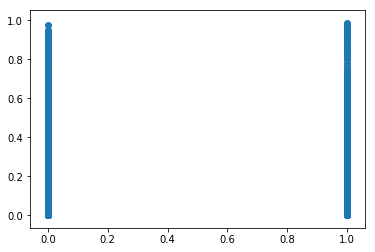

In [20]:
plt.scatter(y_test,predictions)

In [21]:
predictions[9]

array([0.0022154], dtype=float32)

In [22]:
y_train

43262    0
53898    0
33981    0
39050    0
16676    0
8984     0
14958    0
48219    0
28145    0
37503    0
55408    0
44552    0
59245    0
6109     0
68793    0
22347    0
58084    0
48230    0
45165    0
23031    0
71946    0
48974    1
17848    0
22188    1
72620    0
19469    0
3813     0
10128    0
72987    0
16454    0
        ..
13595    0
6706     1
55438    0
54228    0
54982    0
56335    0
29255    0
48784    0
32612    0
28795    0
6999     0
62058    0
33335    0
11909    0
40971    0
42445    0
18814    0
43379    0
74971    0
8497     1
79109    0
34052    0
12132    0
41842    0
22196    0
70473    0
23499    0
6355     0
25900    0
50154    0
Name: Output, Length: 55989, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (23996, 1) and (55989,)

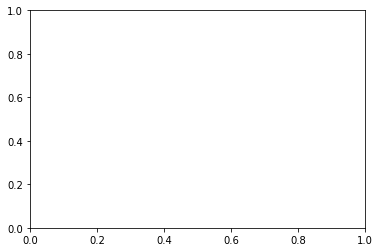

In [24]:
plt.plot(predictions,y_train,)

In [25]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


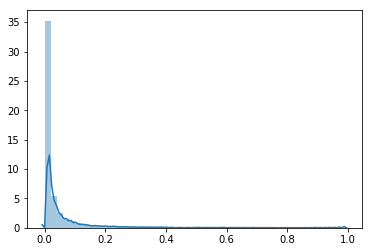

In [26]:
sns.distplot(predictions)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


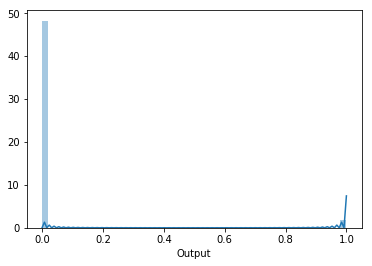

In [27]:
sns.distplot(y_train)

In [28]:
list =[]
for a in predictions:
    if a>0.5:
        list.append(1)
    else:
        list.append(0)

ValueError: x and y must be the same size

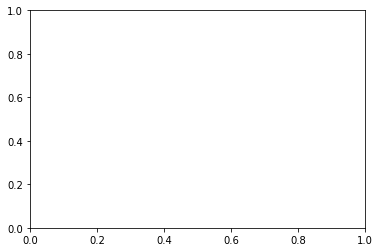

In [29]:
plt.scatter(list,y_train)

In [30]:
i=0
for x in list:
    i=i+1
    
print(i)

j=0
for x in y_train:
    j=j+1

print(j)

23996
55989


In [31]:
list[9]
testX=X_train
y.describe

<bound method NDFrame.describe of 1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
        ..
79969    0
79970    0
79971    0
79972    0
79973    0
79974    0
79975    0
79976    0
79977    0
79978    0
79979    0
79980    1
79981    0
79982    0
79983    0
79984    0
79985    0
79986    0
79987    0
79988    0
79989    0
79990    0
79991    0
79992    0
79993    0
79994    0
79995    0
79996    0
79997    0
79998    0
Name: Output, Length: 79985, dtype: int64>

In [32]:
y.dtype

for i in range(1,79999):
    print(i,end=" ")
    print(y[i])
        #textX.append(X[i-1])
    

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 1
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 1
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 1
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 1
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 1
180 0
181 0
182 0
183 0
184 0
185 

1394 0
1395 0
1396 0
1397 0
1398 0
1399 0
1400 0
1401 0
1402 0
1403 0
1404 0
1405 0
1406 0
1407 0
1408 0
1409 0
1410 0
1411 0
1412 0
1413 0
1414 0
1415 0
1416 0
1417 0
1418 0
1419 0
1420 0
1421 0
1422 0
1423 0
1424 0
1425 0
1426 0
1427 0
1428 0
1429 0
1430 0
1431 0
1432 0
1433 0
1434 0
1435 0
1436 0
1437 0
1438 0
1439 0
1440 0
1441 0
1442 0
1443 0
1444 0
1445 0
1446 0
1447 0
1448 0
1449 0
1450 0
1451 0
1452 0
1453 0
1454 0
1455 0
1456 0
1457 0
1458 0
1459 0
1460 0
1461 0
1462 0
1463 0
1464 0
1465 0
1466 0
1467 0
1468 0
1469 0
1470 0
1471 0
1472 0
1473 0
1474 0
1475 0
1476 0
1477 0
1478 0
1479 0
1480 0
1481 0
1482 0
1483 0
1484 0
1485 0
1486 0
1487 0
1488 0
1489 0
1490 0
1491 0
1492 0
1493 0
1494 0
1495 0
1496 0
1497 0
1498 0
1499 1
1500 0
1501 0
1502 0
1503 0
1504 0
1505 0
1506 0
1507 0
1508 0
1509 0
1510 0
1511 0
1512 0
1513 0
1514 0
1515 0
1516 0
1517 0
1518 0
1519 0
1520 0
1521 0
1522 0
1523 0
1524 0
1525 0
1526 0
1527 1
1528 0
1529 0
1530 0
1531 0
1532 0
1533 0
1534 0
1535 0
1536 0

KeyError: 2251

In [33]:
y[2252]

0

In [34]:
X[2251]

array([80, 50.818042999999996, 83.85441, 60.823654000000005, 91.32122,
       153.73483000000002, 119.60845, 20.170395000000003, 69.134964,
       38.623962, 32.77903, 89.55996999999999, 57.662575, 10.806335,
       26.025686, 20.38816, 36.102340000000005, 37.4699,
       36.368584000000006, 97.07372, 100.866714, 99.40737, 85.864235,
       108.12598999999999, 93.488716, 64.675354, 74.151276, 73.197014,
       94.0849, 142.78452, 113.38592, 25.169554, 62.888495999999996,
       45.337914000000005, 46.55059, 99.21454, 62.206635, 14.201679,
       31.894156, 21.44474, 36.764846999999996, 36.590843,
       36.612629999999996, 95.724434, 99.233376, 96.41530999999999,
       98.235054, 174.32452, 120.51598, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

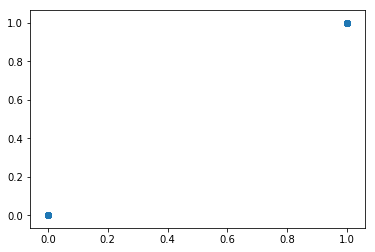

In [35]:
plt.scatter(train['Output'],y)

In [36]:
train[2240:2255]

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,AGE,...,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M,Output
2241,32735,185493,2139-04-30_14:39:00,2139-02-24_11:25:00,Private,ENGL,CATHOLIC,WIDOWED,WHITE,66,...,0.0,0.0,0,0,1,0,0,0,1,0
2242,376,147321,2184-01-30_09:00:00,2168-05-07_16:32:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,56,...,1.0,0.0,0,0,0,0,1,1,0,0
2243,4860,128430,2194-03-21_22:13:00,2162-06-05_15:40:00,Private,ENGL,CATHOLIC,MARRIED,WHITE,56,...,1.0,0.0,0,0,1,0,0,0,1,0
2244,22321,109890,2167-09-05_04:23:00,2119-06-28_14:19:00,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,43,...,0.0,0.0,0,0,0,0,1,1,0,0
2245,60169,144642,2126-09-27_13:00:00,2144-02-05_16:36:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,61,...,0.0,0.0,0,1,0,0,0,1,0,0
2246,18333,120032,2129-07-11_15:24:00,2187-12-18_14:30:00,Medicare,ENGL,UNOBTAINABLE,MARRIED,WHITE,66,...,1.0,0.0,0,0,0,1,0,0,1,0
2247,61743,196367,2100-11-25_12:00:00,2141-08-22_17:30:00,Medicare,ENGL,UNOBTAINABLE,WIDOWED,WHITE,82,...,0.0,0.0,0,1,0,0,0,0,1,0
2248,31831,114216,2111-02-28_19:34:00,2150-07-06_18:36:00,Private,*DEA,NOT_SPECIFIED,MARRIED,WHITE,59,...,1.0,0.0,0,0,1,0,0,0,1,0
2249,17718,193082,2134-08-22_23:38:00,2160-07-30_13:15:00,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,66,...,1.0,0.0,1,0,0,0,0,1,0,0
2250,43708,177805,2100-09-14_12:12:00,2138-06-07_13:00:00,Medicare,ENGL,UNOBTAINABLE,DIVORCED,WHITE,72,...,1.0,0.0,1,0,0,0,0,0,1,0


In [37]:
pred1=classifier.predict(X)
list1 =[]
for a in pred1:
    if a>0.5:
        list1.append(1)
    else:
        list1.append(0)
y[79980]

1

In [38]:
pred1[79980]

array([1.], dtype=float32)

In [39]:
for x in predictions:
    if x!=0:
        print("hey")

hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey
hey


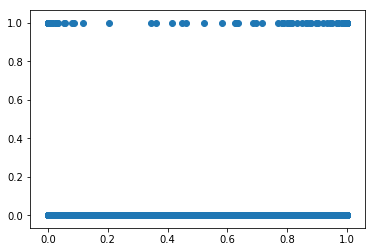

In [40]:
plt.scatter(pred1,y)

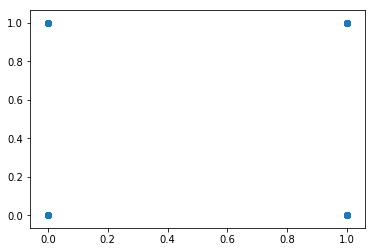

In [41]:
plt.scatter(y_test,pred2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


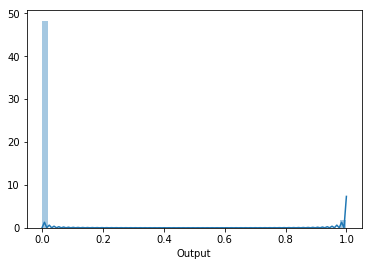

In [42]:
sns.distplot(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


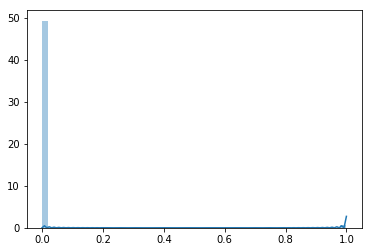

In [43]:
sns.distplot(pred2)

In [44]:
test = pd.read_csv('mimic_synthetic_test_updated.csv')
data1=pd.get_dummies(test['GENDER'])
test=pd.concat([test, data1], axis=1)
test=test.drop(['GENDER'],axis=1)


data=pd.get_dummies(test['ICU'])
test=pd.concat([test, data], axis=1)
test=test.drop(['ICU'],axis=1)

#data1=pd.get_dummies(test['MARITAL_STATUS'])
#test=pd.concat([test, data1], axis=1)
#test=test.drop(['MARITAL_STATUS'],axis=1)

test= test.iloc[:,9:347]
test = test.fillna(0.0)
test.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (291,336) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Columns: 337 entries, AGE to TSICU
dtypes: float64(326), int64(2), object(2), uint8(7)
memory usage: 50.5+ MB


In [45]:
test.head()

,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,...,Carditis,HTN,Htncomplicn,F,M,CCU,CSRU,MICU,SICU,TSICU
0,18,72.64388,112.70850,96.464850,85.319580,121.78375,103.074420,47.445683,79.353836,59.368713,...,0.268,0.269,0.27,1,0,0,0,0,1,0
1,56,66.60985,106.79843,83.848660,92.358284,141.43913,122.410645,38.688465,89.153900,56.092617,...,0.000,1.000,0.00,1,0,0,0,1,0,0
2,32,69.71651,102.69377,87.261826,88.278740,176.56640,135.051400,55.030785,114.803215,75.164986,...,0.000,0.000,0.00,0,1,0,0,0,1,0
3,80,63.28020,85.74686,76.753260,89.397710,142.62115,114.484830,42.711350,82.943820,61.819748,...,0.000,0.000,0.00,0,1,0,1,0,0,0
4,83,75.22861,104.36326,94.184980,72.468110,138.86646,104.610660,29.599422,62.111350,49.528816,...,0.000,0.000,0.00,0,1,0,1,0,0,0


In [46]:
a=test.columns
j=0
for i in a:
    print(j,end=" ")
    print(i)
    j=j+1

0 AGE
1 HR_MIN_DAY1
2 HR_MAX_DAY1
3 HR_MEAN_DAY1
4 SYS_BP_MIN_DAY1
5 SYS_BP_MAX_DAY1
6 SYS_BP_MEAN_DAY1
7 DIAS_BP_MIN_DAY1
8 DIAS_BP_MAX_DAY1
9 DIAS_BP_MEAN_DAY1
10 MEAN_BP_MIN_DAY1
11 MEAN_BP_MAX_DAY1
12 MEAN_BP_MEAN_DAY1
13 RESP_RATE_MIN_DAY1
14 RESP_RATE_MAX_DAY1
15 RESP_RATE_MEAN_DAY1
16 TEMP_MIN_DAY1
17 TEMP_MAX_DAY1
18 TEMP_MEAN_DAY1
19 SPO2_MIN_DAY1
20 SPO2_MAX_DAY1
21 SPO2_MEAN_DAY1
22 GLUCOSE_MIN_DAY1
23 GLUCOSE_MAX_DAY1
24 GLUCOSE_MEAN_DAY1
25 HR_MIN_DAY2
26 HR_MAX_DAY2
27 HR_MEAN_DAY2
28 SYS_BP_MIN_DAY2
29 SYS_BP_MAX_DAY2
30 SYS_BP_MEAN_DAY2
31 DIAS_BP_MIN_DAY2
32 DIAS_BP_MAX_DAY2
33 DIAS_BP_MEAN_DAY2
34 MEAN_BP_MIN_DAY2
35 MEAN_BP_MAX_DAY2
36 MEAN_BP_MEAN_DAY2
37 RESP_RATE_MIN_DAY2
38 RESP_RATE_MAX_DAY2
39 RESP_RATE_MEAN_DAY2
40 TEMP_MIN_DAY2
41 TEMP_MAX_DAY2
42 TEMP_MEAN_DAY2
43 SPO2_MIN_DAY2
44 SPO2_MAX_DAY2
45 SPO2_MEAN_DAY2
46 GLUCOSE_MIN_DAY2
47 GLUCOSE_MAX_DAY2
48 GLUCOSE_MEAN_DAY2
49 Tuberculosis
50 Immuniz/scrn
51 AcuteMI
52 Coronathero
53 Chestpain
54 Pulmhartdx
55

In [47]:
test

,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,...,Carditis,HTN,Htncomplicn,F,M,CCU,CSRU,MICU,SICU,TSICU
0,18,72.643880,112.708500,96.464850,85.319580,121.783750,103.074420,47.445683,79.353836,59.368713,...,0.268,0.269,0.27,1,0,0,0,0,1,0
1,56,66.609850,106.798430,83.848660,92.358284,141.439130,122.410645,38.688465,89.153900,56.092617,...,0.000,1.000,0.00,1,0,0,0,1,0,0
2,32,69.716510,102.693770,87.261826,88.278740,176.566400,135.051400,55.030785,114.803215,75.164986,...,0.000,0.000,0.00,0,1,0,0,0,1,0
3,80,63.280200,85.746860,76.753260,89.397710,142.621150,114.484830,42.711350,82.943820,61.819748,...,0.000,0.000,0.00,0,1,0,1,0,0,0
4,83,75.228610,104.363260,94.184980,72.468110,138.866460,104.610660,29.599422,62.111350,49.528816,...,0.000,0.000,0.00,0,1,0,1,0,0,0
5,73,54.878765,77.448685,63.574020,107.238620,136.937410,127.540620,54.586754,80.073906,61.124740,...,0.000,1.000,0.00,0,1,1,0,0,0,0
6,72,68.585710,83.714584,77.713410,107.014000,131.077270,124.640076,56.429073,72.086624,66.191696,...,0.000,0.000,0.00,0,1,1,0,0,0,0
7,64,68.257020,92.435270,76.485630,74.459400,141.124910,102.919450,23.697308,57.789260,40.101234,...,0.000,1.000,0.00,1,0,0,1,0,0,0
8,57,85.810760,113.013280,93.876520,94.409890,178.291260,125.273040,48.701923,92.660880,64.073425,...,0.000,1.000,0.00,0,1,0,0,0,1,0
9,71,101.882195,121.675490,122.596650,101.679790,153.156590,123.454540,66.753700,82.075800,76.702510,...,0.000,0.000,1.00,0,1,0,1,0,0,0


In [48]:
test=test.drop([0],axis=0)

In [49]:
pred_ann=classifier.predict(test)

In [50]:
lt=[]
for i in pred_ann:
    if i>0.5:
        lt.append(1)
        print(1)
    else:
        lt.append(0)
        print(0)

1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1


1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1


1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1


1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1


In [19]:
count=0
count1=0
for i in pred_ann:
    count = count + 1
    if i == 1:
        count1=count1+1
print(count)
print(count1)

NameError: name 'pred_ann' is not defined

In [52]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


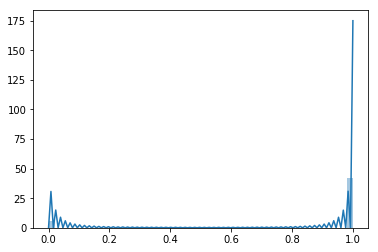

In [53]:
sns.distplot(pred_ann)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
pred_log_reg = logmodel.predict(test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,pred_log_reg))

ValueError: Found input variables with inconsistent numbers of samples: [23996, 20000]

In [60]:
count=0
count1=0
for i in pred_log_reg:
    count = count + 1
    if i == 1:
        count1=count1+1
print(count)
print(count1)

20000
19992


In [61]:
k=[]
for i in pred_log_reg:
    k.append(i)
    

#import numpy as np
#np.savetxt("mimic_synthetic_test.csv", k, delimiter=",", fmt='%s')

In [62]:
k

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [139]:
from sklearn.svm import SVC

In [140]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
pred_svm = model.predict(test)

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
count=0
count1=0
for i in predictions:
    count = count + 1
    print(i)
    if i == 1:
        count1=count1+1
print(count)
print(count1)

In [75]:
#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [76]:
#from sklearn.model_selection import GridSearchCV

In [77]:
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:

#grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


In [ ]:
#grid.best_params_

In [63]:
ls=[]
count=0
ls=test.isnull().sum()
for i in ls:
    if i!=0:
        print('Hello')
    else:
        count=count+1
print(count)

337


In [35]:
train_1=train[train['Output']>0]
train_0_raw=train[train['Output']<1]  
train_0=train_0_raw.iloc[:1700,:] 

In [36]:
balanced_train=pd.concat([train_0,train_1])

In [37]:
y=balanced_train['Output']

In [38]:
X = balanced_train.iloc[:,9:346]

In [55]:
X.head()

,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,...,Carditis,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M
1,39,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.56676,...,0.0,0.0,1.0,1,0,0,0,0,0,1
2,40,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.35033,...,0.0,0.0,0.0,0,0,1,0,0,0,1
3,75,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.84992,...,0.0,1.0,0.0,1,0,0,0,0,0,1
4,55,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.30948,...,0.0,0.0,0.0,0,0,1,0,0,1,0
5,66,40.019630,68.435030,60.395480,97.198326,140.94010,109.457480,43.979748,79.828740,63.19138,...,0.0,0.0,0.0,0,0,0,0,1,1,0


In [1]:
import numpy as np
mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (79985,337) 
noise = np.random.normal(mu, sigma, [79985,337]) 

In [9]:
signal=train

In [10]:
signal.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,AGE,...,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M,Output
1,50520,186416,2134-03-17_03:59:00,2113-03-06_12:05:00,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,39,...,0.0,1.0,1,0,0,0,0,0,1,0
2,17956,126413,2164-04-05_17:32:00,2180-09-20_16:30:00,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,40,...,0.0,0.0,0,0,1,0,0,0,1,0
3,90258,109355,2102-09-08_00:58:00,2166-06-26_15:30:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,75,...,1.0,0.0,1,0,0,0,0,0,1,0
4,25159,123784,2163-08-06_12:07:00,2147-01-14_18:40:00,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,55,...,0.0,0.0,0,0,1,0,0,1,0,0
5,11634,144424,2147-08-30_19:51:00,2136-11-19_18:53:00,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,66,...,0.0,0.0,0,0,0,0,1,1,0,0


In [11]:
signal = signal.iloc[:,9:346]

In [12]:
signal.head()

,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,...,Carditis,HTN,Htncomplicn,CCU,CSRU,MICU,SICU,TSICU,F,M
1,39,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.56676,...,0.0,0.0,1.0,1,0,0,0,0,0,1
2,40,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.35033,...,0.0,0.0,0.0,0,0,1,0,0,0,1
3,75,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.84992,...,0.0,1.0,0.0,1,0,0,0,0,0,1
4,55,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.30948,...,0.0,0.0,0.0,0,0,1,0,0,1,0
5,66,40.019630,68.435030,60.395480,97.198326,140.94010,109.457480,43.979748,79.828740,63.19138,...,0.0,0.0,0.0,0,0,0,0,1,1,0


In [13]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79985 entries, 1 to 79998
Columns: 337 entries, AGE to M
dtypes: float64(327), int64(1), object(2), uint8(7)
memory usage: 202.5+ MB


In [14]:
signal = signal + noise

TypeError: must be str, not float